In [7]:
import numpy as np
import MDAnalysis as mda
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from MDAnalysis.analysis import align, encore, psa
from MDAnalysis.analysis.encore.dimensionality_reduction import DimensionalityReductionMethod as drm


In [9]:
#align
path = "C:\\Benj\KresslerLab_BP\\Structure Claudio\\Sch9 MDAnalysis\\"

mobile = mda.Universe(path+'Sch9.S288J_em.pdb', path+'Sch9.S288J_2_md_center.xtc')
ref = mda.Universe(path+'Sch9_em.pdb', path+'Sch9_1_md_center.xtc')

mobile.trajectory[-1]
ref.trajectory[0]
align.AlignTraj(mobile, ref, select='resid 183-216 or resid 327-708', filename=path+'Sch9.S288J_2_md_aligned.xtc').run()

In [6]:
#load
path = "C:\\Benj\KresslerLab_BP\\Structure Claudio\\Sch9 MDAnalysis\\"

Sch9_1 = mda.Universe(path+'Sch9_em.pdb', path+'Sch9_1_md_aligned.xtc')
Sch9_2 = mda.Universe(path+'Sch9_em.pdb', path+'Sch9_2_md_aligned.xtc')
Sch9_3 = mda.Universe(path+'Sch9_em.pdb', path+'Sch9_3_md_aligned.xtc')
Sch9S288J_1 = mda.Universe(path+'Sch9.S288J_em.pdb', path+'Sch9.S288J_1_md_aligned.xtc')
Sch9S288J_2 = mda.Universe(path+'Sch9.S288J_em.pdb', path+'Sch9.S288J_2_md_aligned.xtc')
Sch9S288J_3 = mda.Universe(path+'Sch9.S288J_em.pdb', path+'Sch9.S288J_3_md_aligned.xtc')

In [9]:
labels = ['Sch9_1', 'Sch9_2', 'Sch9_3', 'Sch9S288J_1', 'Sch9S288J_2', 'Sch9S288J_3']
ps = psa.PSAnalysis([Sch9_1, Sch9_2, Sch9_3, Sch9S288J_1, Sch9S288J_2, Sch9S288J_3],
                    labels=labels,
                    #reference=ref,
                    #select=CORE_sel,
                    path_select='name CA')
ps.generate_paths(align=False, save=False, weights=None)
ps.run(metric='hausdorff')

(array([[ 0.        ,  3.        , 18.81721763,  2.        ],
        [ 1.        ,  5.        , 20.70635073,  2.        ],
        [ 6.        ,  7.        , 21.82871829,  4.        ],
        [ 4.        ,  8.        , 24.66066821,  5.        ],
        [ 2.        ,  9.        , 26.48891508,  6.        ]]),
 {'icoord': [[25.0, 25.0, 35.0, 35.0],
   [45.0, 45.0, 55.0, 55.0],
   [30.0, 30.0, 50.0, 50.0],
   [15.0, 15.0, 40.0, 40.0],
   [5.0, 5.0, 27.5, 27.5]],
  'dcoord': [[0.0, 18.81721763379437, 18.81721763379437, 0.0],
   [0.0, 20.706350728539263, 20.706350728539263, 0.0],
   [18.81721763379437,
    21.828718286122783,
    21.828718286122783,
    20.706350728539263],
   [0.0, 24.660668207898187, 24.660668207898187, 21.828718286122783],
   [0.0, 26.488915076692642, 26.488915076692642, 24.660668207898187]],
  'ivl': ['2', '4', '0', '3', '1', '5'],
  'leaves': [2, 4, 0, 3, 1, 5],
  'color_list': ['C0', 'C0', 'C0', 'C0', 'C0'],
  'leaves_color_list': ['C0', 'C0', 'C0', 'C0', 'C0', 'C0'

<Figure size 640x480 with 0 Axes>

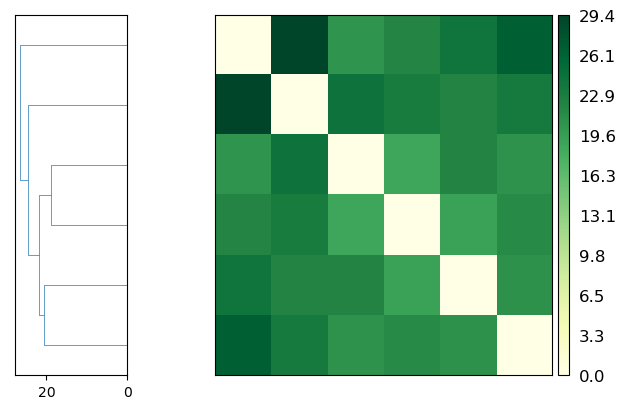

In [10]:
ps.plot()

In [ ]:
pc1 = drm.PrincipalComponentAnalysis(dimension=1,
                                     svd_solver='auto')
pc2 = drm.PrincipalComponentAnalysis(dimension=2,
                                     svd_solver='auto')
#dres0, details0 = encore.dres([Sch9_1, Sch9_2, Sch9_3, Sch9S288J_1, Sch9S288J_2, Sch9S288J_3], select='(resid 1-287 or resid 289-824) and name CA')
dres0, details0 = encore.dres([Sch9_1, Sch9_2, Sch9_3, Sch9S288J_1, Sch9S288J_2, Sch9S288J_3], select='name CA',dimensionality_reduction_method=[pc1, pc2], ncores=4)